# Car Reselling price prediction

This dataset contains information about used cars and used here to reselling price prediction.

Dataset source: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
import pandas as pd
import numpy as np 
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.io as pio
from sklearn.metrics import r2_score, mean_squared_error
import xgboost
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

#### Data Description

In [2]:
df_vehicle = pd.read_csv('Car details v3.csv')
df_vehicle.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df_vehicle.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Data Preprocessing

First convert feature name into upper case

In [4]:
df_vehicle['name'] = df_vehicle['name'].str.upper()

Process each numeric columns and Remove units from values.

In [5]:
df_vehicle['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

As all the engine values are in CC lets remove units from the column

In [6]:
df_vehicle[['engine_value', 'unit']] = df_vehicle['engine'].str.split(expand=True)

In [7]:
df_vehicle['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

As all the Max power values are in BHP lets remove units from the column

In [8]:
df_vehicle[['max_power_value', 'unit']] = df_vehicle['max_power'].str.split(expand=True)

In [9]:
df_vehicle['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

Values for the milage contains 2 units mainly 'KMPL' and 'Km/KG' that is because the LPG and CNG are calcuated in KG. 

In [10]:
df_vehicle[['mileage_value', 'unit']] = df_vehicle['mileage'].str.split(expand=True)

In [11]:
df_vehicle.unit.value_counts()

kmpl     7819
km/kg      88
Name: unit, dtype: int64

As there are not much values in km/kg lets consider them in KMPL only. 

In [12]:
df_vehicle.drop(labels='unit', axis=1, inplace=True)

As car company is an important attribute while calcualting the car price Creating a new feature for the company name by getting the first name for the name column.

In [13]:
df_vehicle['name'].unique()

array(['MARUTI SWIFT DZIRE VDI', 'SKODA RAPID 1.5 TDI AMBITION',
       'HONDA CITY 2017-2020 EXI', ..., 'TATA NEXON 1.5 REVOTORQ XT',
       'FORD FREESTYLE TITANIUM PLUS DIESEL BSIV',
       'TOYOTA INNOVA 2.5 GX (DIESEL) 8 SEATER BS IV'], dtype=object)

In [14]:
df_vehicle['company'] = df_vehicle['name'].str.split().str.get(0)

In [15]:
df_vehicle['company'].unique()

array(['MARUTI', 'SKODA', 'HONDA', 'HYUNDAI', 'TOYOTA', 'FORD', 'RENAULT',
       'MAHINDRA', 'TATA', 'CHEVROLET', 'FIAT', 'DATSUN', 'JEEP',
       'MERCEDES-BENZ', 'MITSUBISHI', 'AUDI', 'VOLKSWAGEN', 'BMW',
       'NISSAN', 'LEXUS', 'JAGUAR', 'LAND', 'MG', 'VOLVO', 'DAEWOO',
       'KIA', 'FORCE', 'AMBASSADOR', 'ASHOK', 'ISUZU', 'OPEL', 'PEUGEOT'],
      dtype=object)

### Handling missing values

Convert values to numeric values

In [16]:
df_vehicle['engine_value'] = pd.to_numeric(df_vehicle['engine_value'], errors='coerce')
df_vehicle['max_power_value'] = pd.to_numeric(df_vehicle['max_power_value'], errors='coerce')
df_vehicle['mileage_value'] = pd.to_numeric(df_vehicle['mileage_value'], errors='coerce')

In [17]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage          7907 non-null   object 
 9   engine           7907 non-null   object 
 10  max_power        7913 non-null   object 
 11  torque           7906 non-null   object 
 12  seats            7907 non-null   float64
 13  engine_value     7907 non-null   float64
 14  max_power_value  7912 non-null   float64
 15  mileage_value    7907 non-null   float64
 16  company          8128 non-null   object 
dtypes: float64(4),

As we can see there are significant missign values in the. Filling these values as below:
1. Check if the car with similar name exists then pick value from there. 
2. if not aggregated car from the same company name and fill them. 

In [18]:
df_null = df_vehicle[df_vehicle.isna().any(axis=1)]
df_not_null = df_vehicle.dropna()

In [19]:
for ind in df_null.index:
    if not df_not_null[df_vehicle['name'] == df_vehicle['name'][ind]].empty:
        if pd.isna(df_vehicle['mileage'][ind]):
            df_vehicle['mileage'][ind] = df_not_null[df_vehicle['name'] == df_vehicle['name'][ind]].iloc[0]['mileage']
            df_vehicle['mileage_value'][ind] = df_not_null[df_vehicle['name'] == df_vehicle['name'][ind]].iloc[0]['mileage_value']
            
        if pd.isna(df_vehicle['engine'][ind]):
            df_vehicle['engine'][ind] = df_not_null[df_vehicle['name'] == df_vehicle['name'][ind]].iloc[0]['engine']
            df_vehicle['engine_value'][ind] = df_not_null[df_vehicle['name'] == df_vehicle['name'][ind]].iloc[0]['engine_value']

        if pd.isna(df_vehicle['max_power'][ind]):
            df_vehicle['max_power'][ind] = df_not_null[df_vehicle['name'] == df_vehicle['name'][ind]].iloc[0]['max_power']
            df_vehicle['max_power_value'][ind] = df_not_null[df_vehicle['name'] == df_vehicle['name'][ind]].iloc[0]['max_power_value']

        if pd.isna(df_vehicle['seats'][ind]):
            df_vehicle['seats'][ind] = df_not_null[df_vehicle['name'] == df_vehicle['name'][ind]].iloc[0]['seats'] 
    else:
        tmp_name = ' '.join(df_vehicle['name'][ind].split(' ')[:2])
        #print(tmp_name)
        df_tmp = df_not_null[df_vehicle['name'].str.contains(tmp_name)]
        if not df_tmp.empty:
            if pd.isna(df_vehicle['mileage'][ind]):
                df_vehicle['mileage'][ind] = df_tmp.iloc[0]['mileage']
                df_vehicle['mileage_value'][ind] = round(df_tmp['mileage_value'].mean(), 2)

            if pd.isna(df_vehicle['engine'][ind]):
                df_vehicle['engine'][ind] = df_tmp.iloc[0]['engine']
                df_vehicle['engine_value'][ind] = round(df_tmp['engine_value'].mean(), 2)

            if pd.isna(df_vehicle['max_power'][ind]):
                df_vehicle['max_power'][ind] = df_tmp.iloc[0]['max_power']
                df_vehicle['max_power_value'][ind] = round(df_tmp['max_power_value'].mean(), 2)

            if pd.isna(df_vehicle['seats'][ind]):
                df_vehicle['seats'][ind] = df_tmp.iloc[0]['seats']
        

In [20]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage          8107 non-null   object 
 9   engine           8107 non-null   object 
 10  max_power        8107 non-null   object 
 11  torque           7906 non-null   object 
 12  seats            8107 non-null   float64
 13  engine_value     8107 non-null   float64
 14  max_power_value  8106 non-null   float64
 15  mileage_value    8107 non-null   float64
 16  company          8128 non-null   object 
dtypes: float64(4),

There are still some columns with the null values lets fill them with the average values form each column

In [21]:
df_vehicle['engine_value'].fillna(round(df_vehicle['engine_value'].mean(), 2), inplace=True)
df_vehicle['max_power_value'].fillna(round(df_vehicle['max_power_value'].mean(), 2), inplace=True)
df_vehicle['mileage_value'].fillna(round(df_vehicle['mileage_value'].mean(), 2), inplace=True)
df_vehicle['seats'].fillna(round(df_vehicle['seats'].mean(), 0), inplace=True)

### Data analysis

Analysis of features

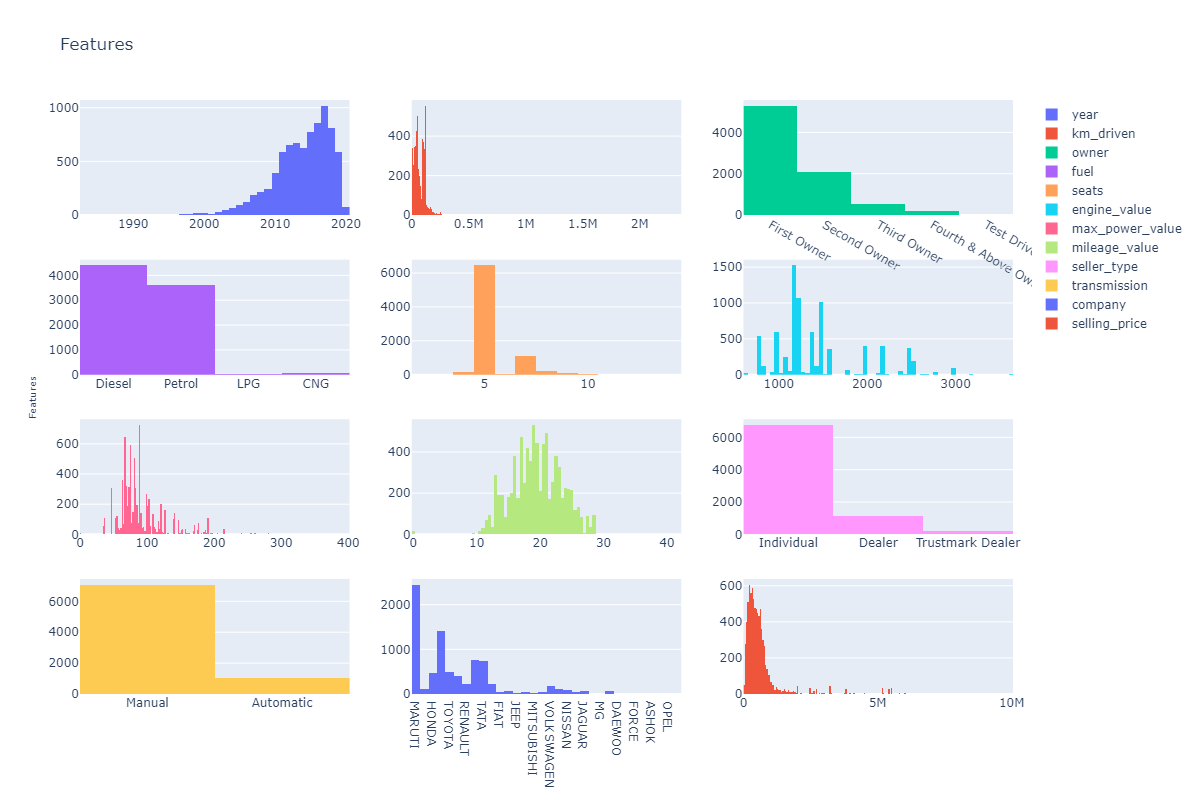

In [22]:
columns = [ 'year', 'km_driven', 'owner', 'fuel', 'seats', 'engine_value', 'max_power_value', 
           'mileage_value', 'seller_type', 'transmission', 'company', 'selling_price' ]

png_renderer = pio.renderers["png"]
pio.renderers.default = "png"
png_renderer.width = 1200
png_renderer.height = 800

fig = make_subplots(rows = 4, cols=3, y_title = 'Features' )
col_num = 0 
row_num = 1

for col in columns:
    if col_num == 3: 
        col_num = 0
        row_num +=1 
    col_num +=1 
    title = col
    fig.add_trace(go.Histogram(x=df_vehicle[col], name=title),
                 row=row_num,
                 col=col_num)
fig.update_layout(height=800, width=1200, title_text="Features",
                  annotations=[{ 
                      'font': {'size': 10}
                  }])    
fig.show()

Plotting each feature variable with selling price

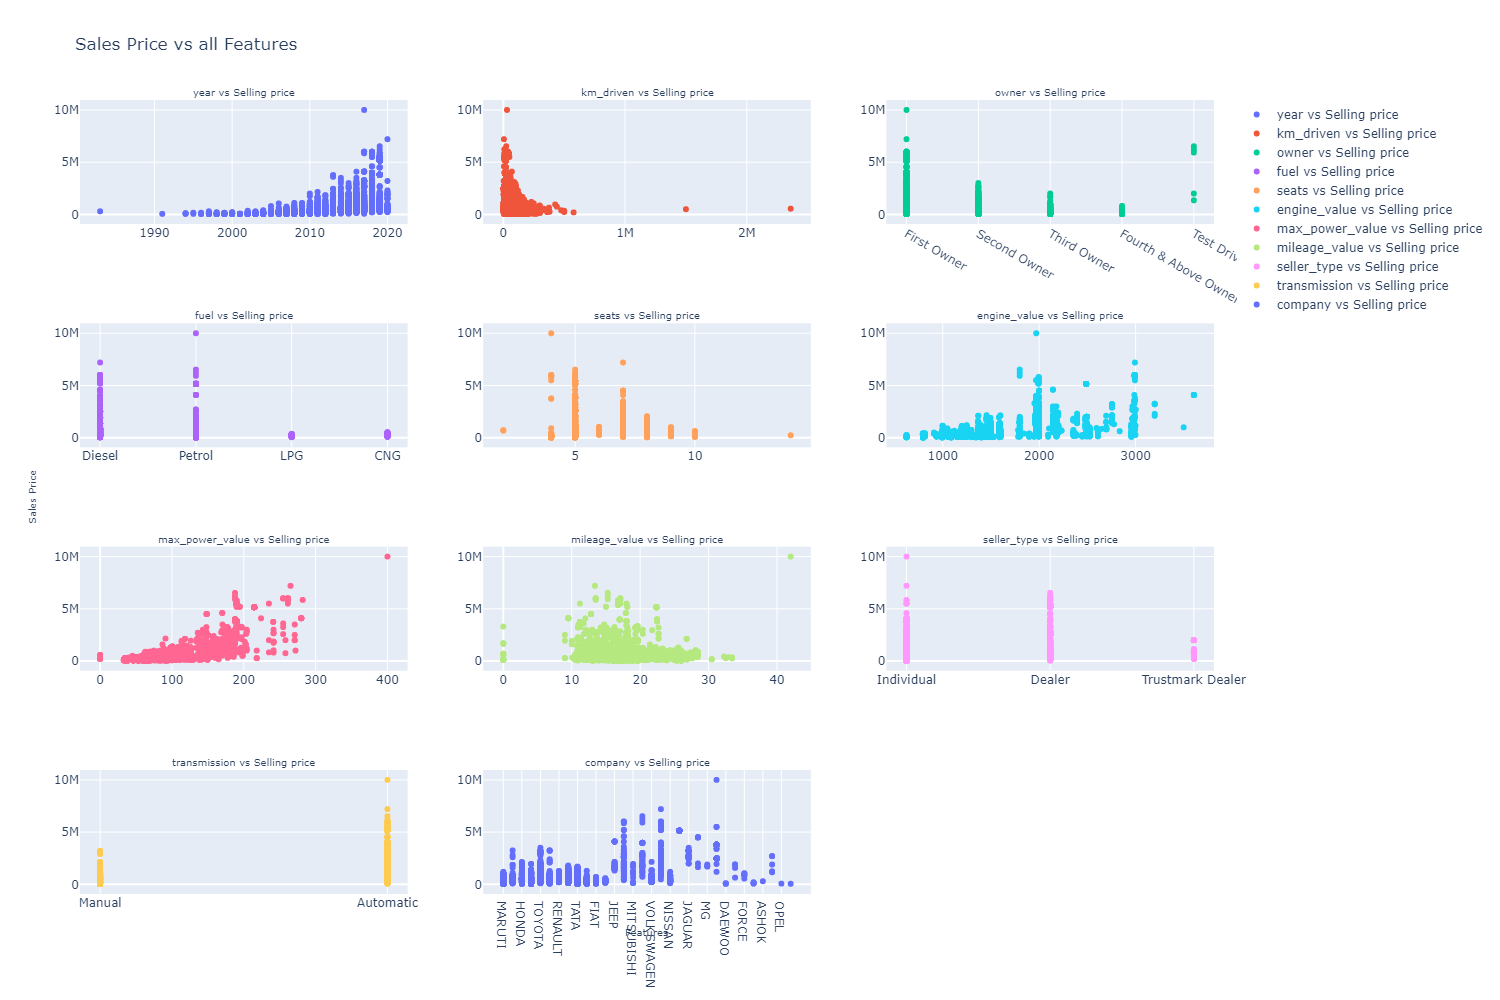

In [23]:
columns = [ 'year', 'km_driven', 'owner', 'fuel', 'seats', 'engine_value', 'max_power_value', 
           'mileage_value', 'seller_type', 'transmission', 'company' ]
png_renderer.width = 1500
png_renderer.height = 1000
fig = make_subplots(rows = 4, cols=3, subplot_titles=[str(col + ' vs Selling price') for col in columns], 
                    x_title ='Features' , y_title = 'Sales Price' )
col_num = 0 
row_num = 1

for col in columns:
    if col_num == 3: 
        col_num = 0
        row_num +=1 
    col_num +=1 
    title = col + ' vs Selling price'
    fig.add_trace(go.Scatter(x=df_vehicle[col], y=df_vehicle.selling_price,  mode='markers', name=title),
                 row=row_num,
                 col=col_num)
fig.update_layout(height=1000, width=1500, title_text="Sales Price vs all Features",
                  annotations=[{ 
                      'font': {'size': 10}
                  }])    
fig.show()

Observations: 
    1. Cars with recent purchase are sold for higher price. 
    2. Cars with less running KM are sold at higher price
    3. Cars with fourth owner are sold for less price. 
    4. Selling price increase with incereas in power
    6. Some companies tend to have higher selling price
    5. The values are showing linear releationship for selling price

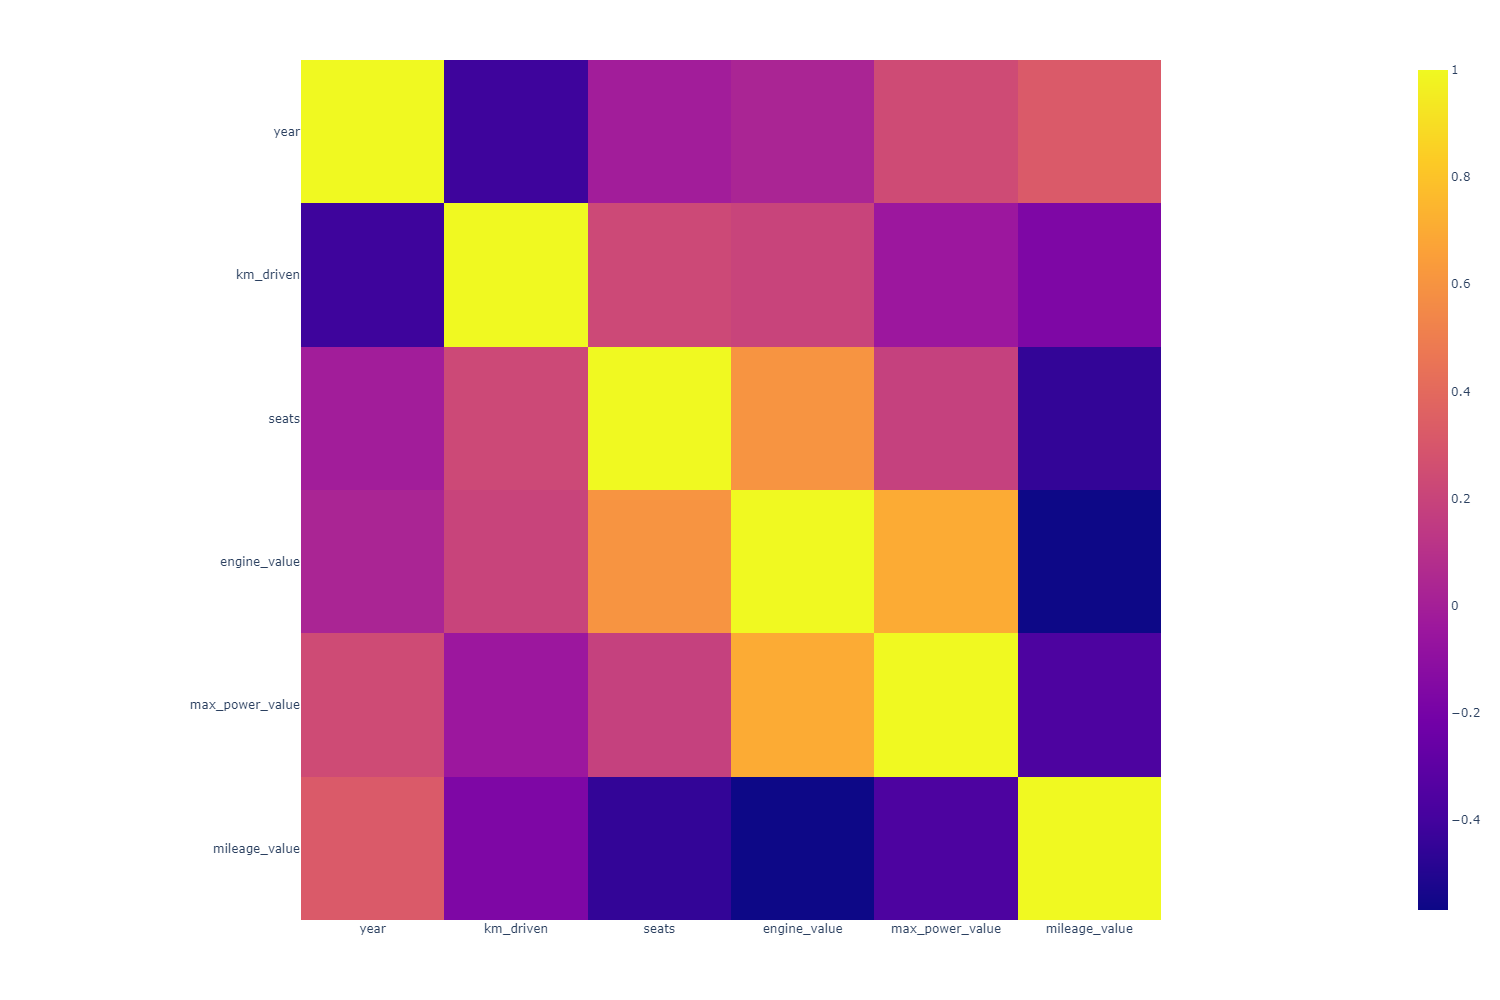

In [24]:
corr_data = df_vehicle[[ 'year', 'km_driven','seats', 'engine_value', 'max_power_value', 'mileage_value']]
correlation = corr_data.corr()
px.imshow(correlation)

### Feature Engineering 

In [25]:
df_vehicle.reset_index(inplace = True, drop = True)

Converting categorical features to numeric type

In [26]:
df_vehicle['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [27]:
owner_dic = {'First Owner' : 0,
             'Second Owner': 1, 
             'Third Owner': 2,
             'Fourth & Above Owner': 4 , 
             'Test Drive Car':5 }
for val in df_vehicle['owner'].index:
    df_vehicle['owner'].iloc[val] = owner_dic[df_vehicle['owner'].iloc[val]]

In [28]:
df_vehicle['owner'] = pd.to_numeric(df_vehicle['owner'], errors='coerce')
df_vehicle['engine_value'] = pd.to_numeric(df_vehicle['engine_value'], errors='coerce')
df_vehicle.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_value,max_power_value,mileage_value,company
0,MARUTI SWIFT DZIRE VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248.0,74.00,23.40,MARUTI
1,SKODA RAPID 1.5 TDI AMBITION,2014,370000,120000,Diesel,Individual,Manual,1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498.0,103.52,21.14,SKODA
2,HONDA CITY 2017-2020 EXI,2006,158000,140000,Petrol,Individual,Manual,2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497.0,78.00,17.70,HONDA
3,HYUNDAI I20 SPORTZ DIESEL,2010,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396.0,90.00,23.00,HYUNDAI
4,MARUTI SWIFT VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298.0,88.20,16.10,MARUTI


In [29]:
oh_encoder = OneHotEncoder()
df_encode_data = pd.DataFrame(oh_encoder.fit_transform(df_vehicle[['seller_type', 'fuel', 'seller_type','transmission', 'company']]).toarray(), columns=oh_encoder.get_feature_names())
df_encode_data.head()

,x0_Dealer,x0_Individual,x0_Trustmark Dealer,x1_CNG,x1_Diesel,x1_LPG,x1_Petrol,x2_Dealer,x2_Individual,x2_Trustmark Dealer,...,x4_MITSUBISHI,x4_NISSAN,x4_OPEL,x4_PEUGEOT,x4_RENAULT,x4_SKODA,x4_TATA,x4_TOYOTA,x4_VOLKSWAGEN,x4_VOLVO
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_vehicle = pd.concat([df_vehicle,df_encode_data],axis=1)
df_vehicle.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,x4_MITSUBISHI,x4_NISSAN,x4_OPEL,x4_PEUGEOT,x4_RENAULT,x4_SKODA,x4_TATA,x4_TOYOTA,x4_VOLKSWAGEN,x4_VOLVO
0,MARUTI SWIFT DZIRE VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248 CC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SKODA RAPID 1.5 TDI AMBITION,2014,370000,120000,Diesel,Individual,Manual,1,21.14 kmpl,1498 CC,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HONDA CITY 2017-2020 EXI,2006,158000,140000,Petrol,Individual,Manual,2,17.7 kmpl,1497 CC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HYUNDAI I20 SPORTZ DIESEL,2010,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396 CC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MARUTI SWIFT VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298 CC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_vehicle.drop(labels=['name', 'fuel','seller_type','transmission', 'mileage', 'engine', 'max_power', 'torque', 'company'  ], axis=1, inplace=True)

In [32]:
df_vehicle.head()

,year,selling_price,km_driven,owner,seats,engine_value,max_power_value,mileage_value,x0_Dealer,x0_Individual,...,x4_MITSUBISHI,x4_NISSAN,x4_OPEL,x4_PEUGEOT,x4_RENAULT,x4_SKODA,x4_TATA,x4_TOYOTA,x4_VOLKSWAGEN,x4_VOLVO
0,2014,450000,145500,0,5.0,1248.0,74.00,23.40,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,1,5.0,1498.0,103.52,21.14,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,158000,140000,2,5.0,1497.0,78.00,17.70,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,225000,127000,0,5.0,1396.0,90.00,23.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,130000,120000,0,5.0,1298.0,88.20,16.10,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Regression 

In [48]:
def train_model(df_data, model):
    X = df_data.drop(labels='selling_price', axis=1)
    y = np.array(df_data['selling_price'])
    # split test and train data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
    lr_model.fit(X_train, y_train)
    y_pred_test = lr_model.predict(X_test)
    y_pred_train = lr_model.predict(X_train)
    print('R2 error test', r2_score(y_test, y_pred_test))
    print('R2 error train', r2_score(y_train, y_pred_train))
    residual  = y_pred_train-y_train
    return model, residual, y_pred_test

In [49]:
lr_model = LinearRegression()
lr_model, residual, y_pred_test = train_model(df_vehicle, lr_model)

R2 error test 0.8028910024935895
R2 error train 0.8522229852841975


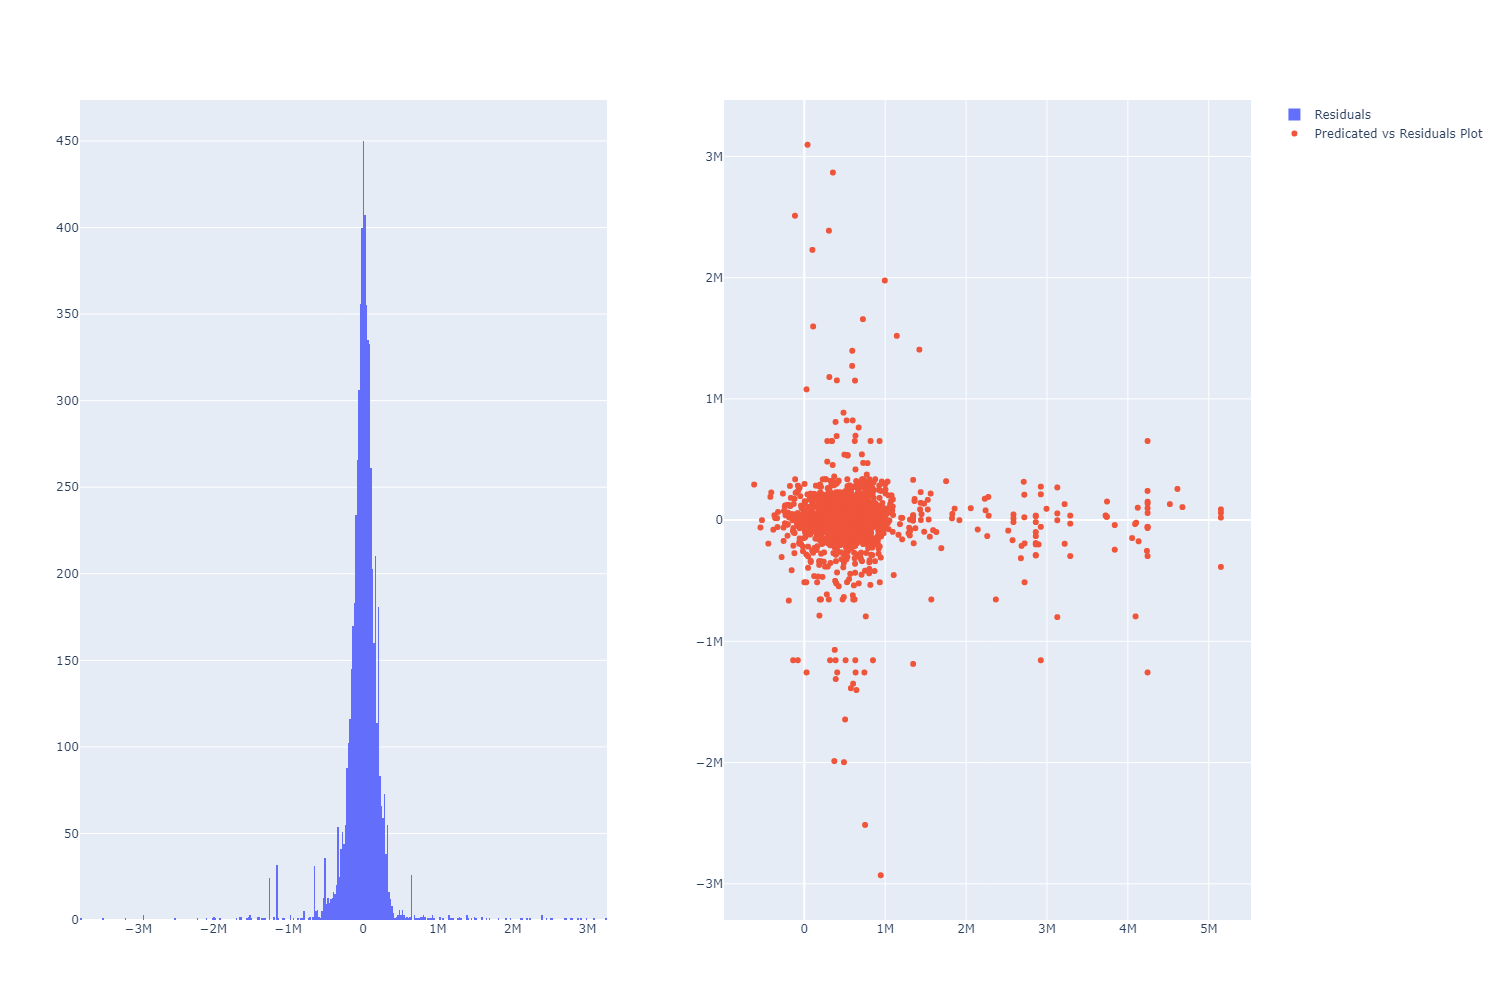

In [51]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Histogram(x=residual, name='Residuals'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=y_pred_test , y=residual, mode='markers', name='Predicated vs Residuals Plot'),
    row=1, col=2
)
fig.show()

Trying making model by removing the ouliers in selling price

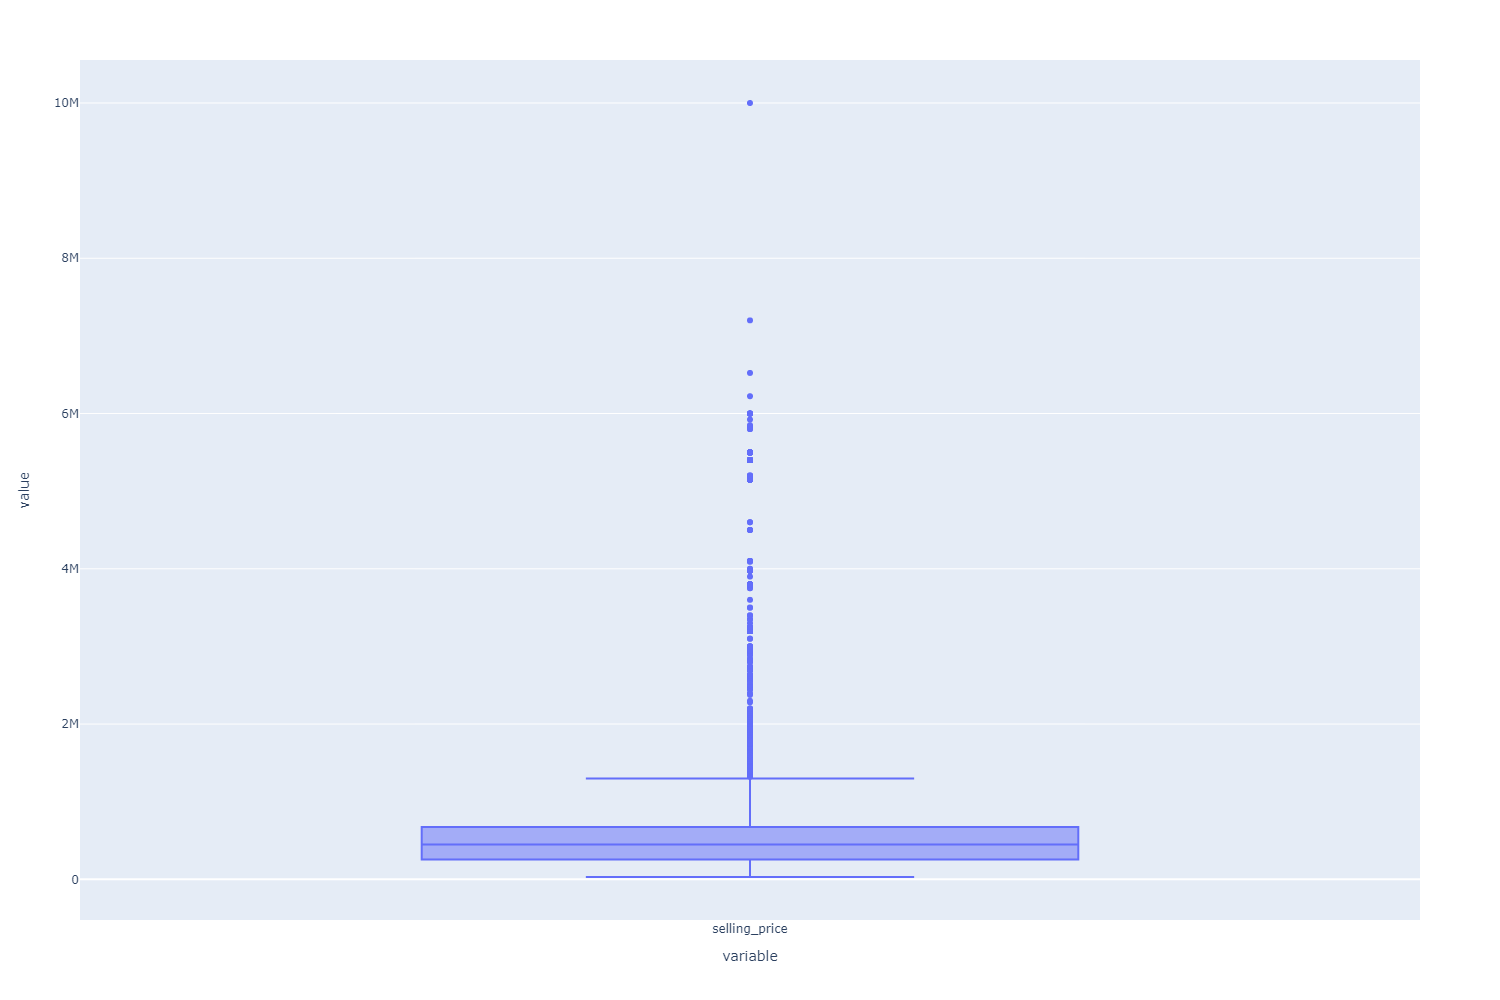

In [52]:
px.box(df_vehicle, y = ['selling_price'])

In [53]:
outliers = []
sp = np.array(df_vehicle.selling_price)
sp = sorted(sp)
q25, q75 = np.percentile(sp, 25), np.percentile(sp, 75)
iqr = q75-q25
lower_bound = q25-(1.5*iqr)
upper_bound = q75+(1.5*iqr)
for val in sp: 
    if (val <lower_bound or val > upper_bound):
        outliers.append(val)

print("Outliers count ", len(outliers))   

Outliers count  600


In [54]:
df_vehicle_out = df_vehicle[df_vehicle.selling_price.between(lower_bound, upper_bound) ]

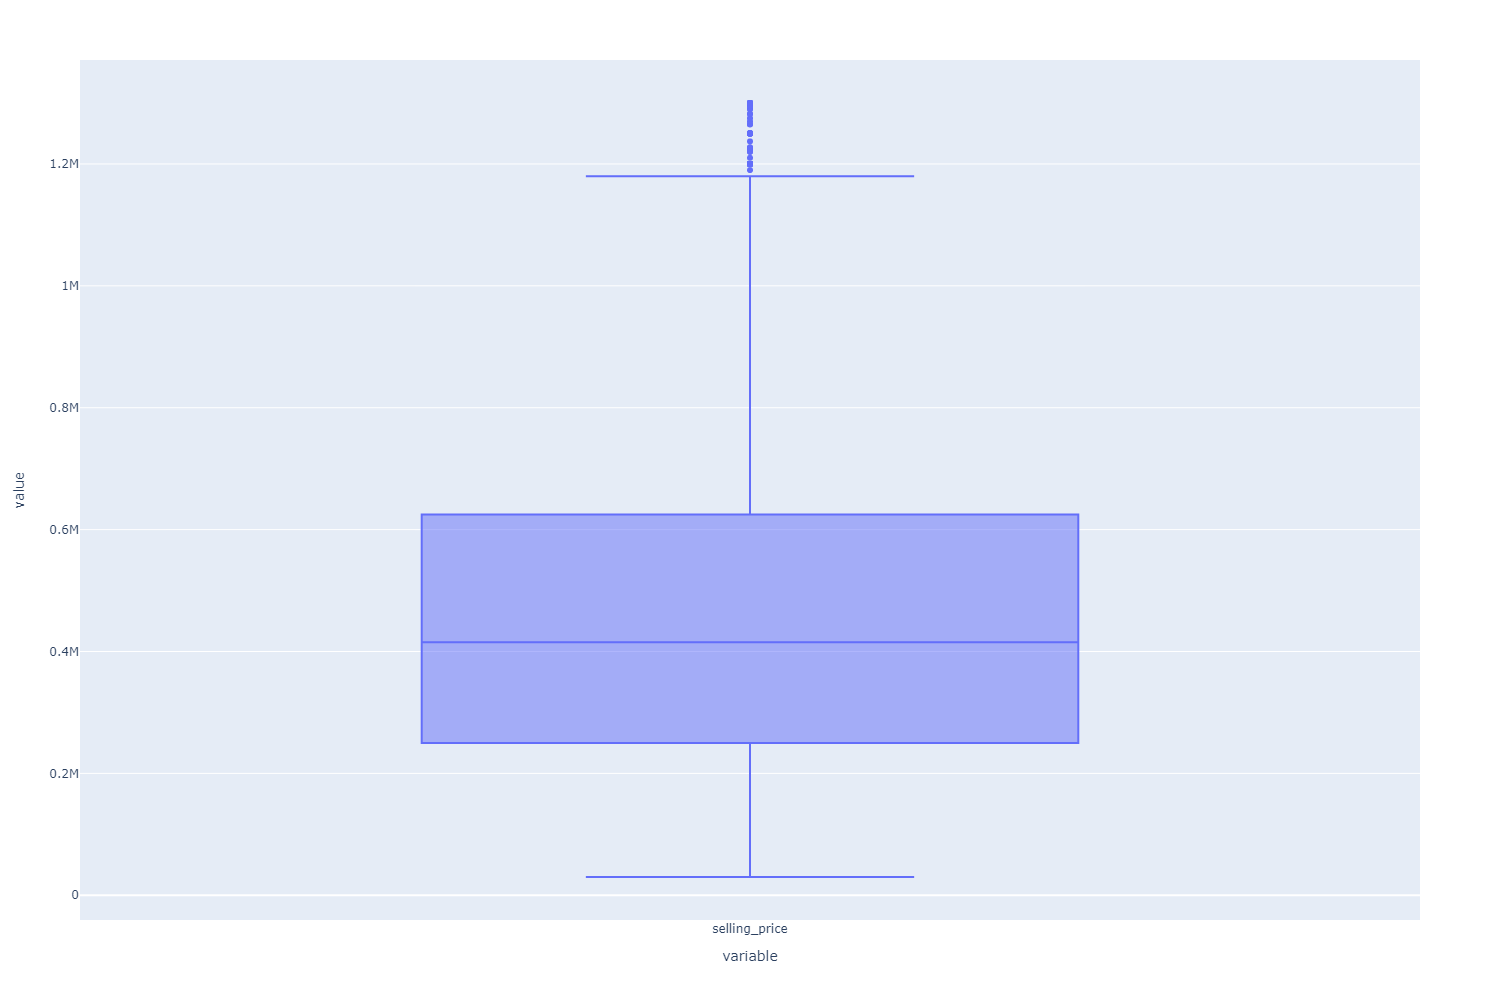

In [55]:
px.box(df_vehicle_out, y = ['selling_price'])

In [57]:
lr_model_out = LinearRegression()
lr_model_out, residual_out, y_pred_test_out = train_model(df_vehicle_out, lr_model_out)

R2 error test 0.757062421123795
R2 error train 0.7547432499403945


Observation: out model scored decreased after removing outliears. That meand points removed were not outlier and were information points

#### Cross Validation

In [58]:
X = df_vehicle.drop(labels='selling_price', axis=1)
y = np.array(df_vehicle['selling_price'])
# split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

lr_cv_model = LinearRegression()

cv_score = cross_val_score(lr_cv_model, X_train, y_train, cv=3)
cv_mean = cv_score.mean()
cv_mean

0.8440641887510014

#### XGBoost 

In [59]:
xbg_rg_model =xgboost.XGBRegressor()

In [60]:
#Hyperparamters tuning
n_estimators = [100, 200, 500, 700, 1000]
booster=['gbtree','gblinear']
learning_rate=[0.01, 0.05, 0.1, 0.25, 0.5]

parameters = {
    'n_estimators': n_estimators,
    'booster':booster,
    'learning_rate':learning_rate,    
}

In [61]:
gs_cv = GridSearchCV(
    estimator=xbg_rg_model,
    param_grid=parameters,
    cv=3, 
    scoring = 'r2'
)
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=Non

In [62]:
print(gs_cv.best_params_)

{'booster': 'gbtree', 'learning_rate': 0.05, 'n_estimators': 700}


In [63]:
print(gs_cv.best_score_)

0.9730720865343736


We are getting the best score using the XGboost algorithm with score of 0.97